In [1]:
# Data
A = read.csv("anes_pilot_2018.csv")

## Question 1: Do US voters have more respect for the police or for journalists?

## Topic
Survey used `feeling thermometer` wigit to understand how the respondents **feel** about some persons or groups (which include both journalists and police). Respondents need to answer on an ordinal scale with a number between 0 and 100. This setting, although, gives a good idea about how favorable or unfavorable the respondant feels about blacks and police, it is only a rough proxy for **respect**. 

### Operational Definition
We are going to use the respondent's feeling about the police and journalists (from columns `ftpolice` and `ftjournal`) as a proxy for the respect they have for these groups. Numbers close to 100 mean high respect and numbers close to 0 mean low respect.

## Exproratory Data Analysis

In [2]:
# Basic variable summary
sub = A[c('ftjournal', 'ftpolice')]
summary(sub)
paste("Number of rows in the original data: ", nrow(sub))

# Visualizing data ros where no responses were provided
print("Non-responding entries")
(sub[sub['ftjournal'] < 0,])

   ftjournal         ftpolice     
 Min.   : -7.00   Min.   :  0.00  
 1st Qu.: 21.00   1st Qu.: 47.00  
 Median : 52.00   Median : 70.00  
 Mean   : 52.26   Mean   : 64.68  
 3rd Qu.: 82.00   3rd Qu.: 90.00  
 Max.   :100.00   Max.   :100.00  

[1] "Number of rows in the original data:  2500"

[1] "Non-responding entries"


,ftjournal,ftpolice
51,-7,84
597,-7,91


   ftjournal         ftpolice     
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 21.00   1st Qu.: 47.00  
 Median : 52.00   Median : 70.00  
 Mean   : 52.31   Mean   : 64.67  
 3rd Qu.: 82.00   3rd Qu.: 90.00  
 Max.   :100.00   Max.   :100.00  

[1] "Number of rows in the transformed data:  2498"

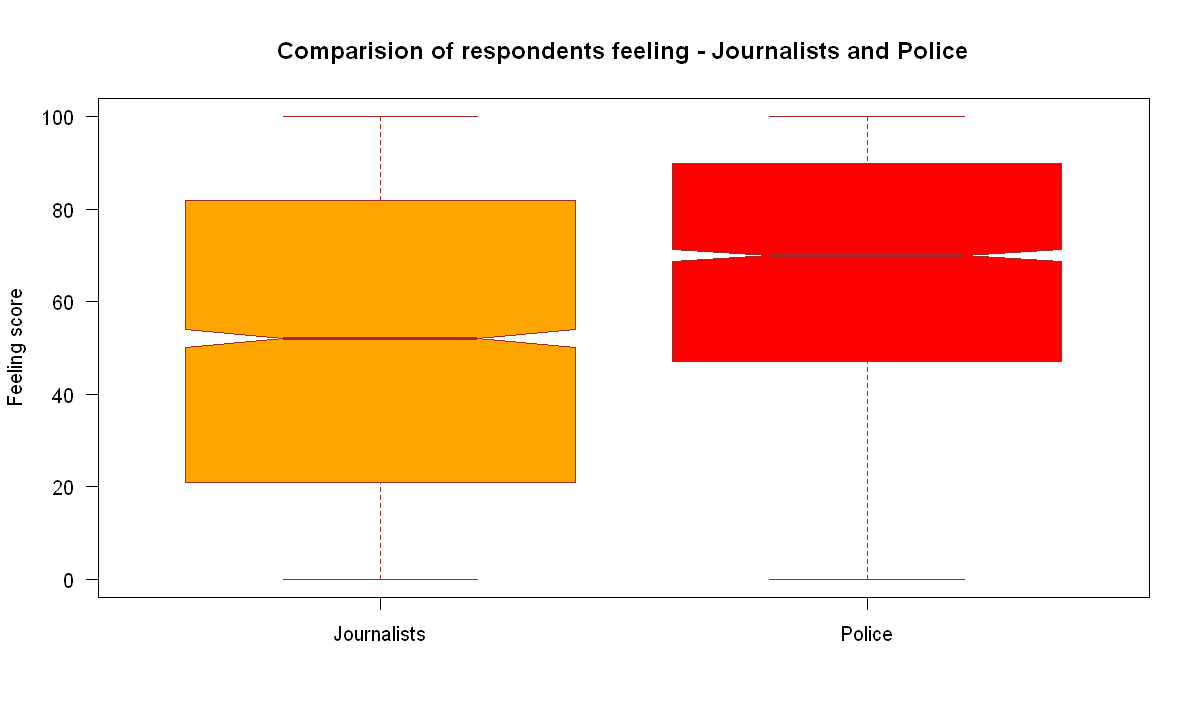

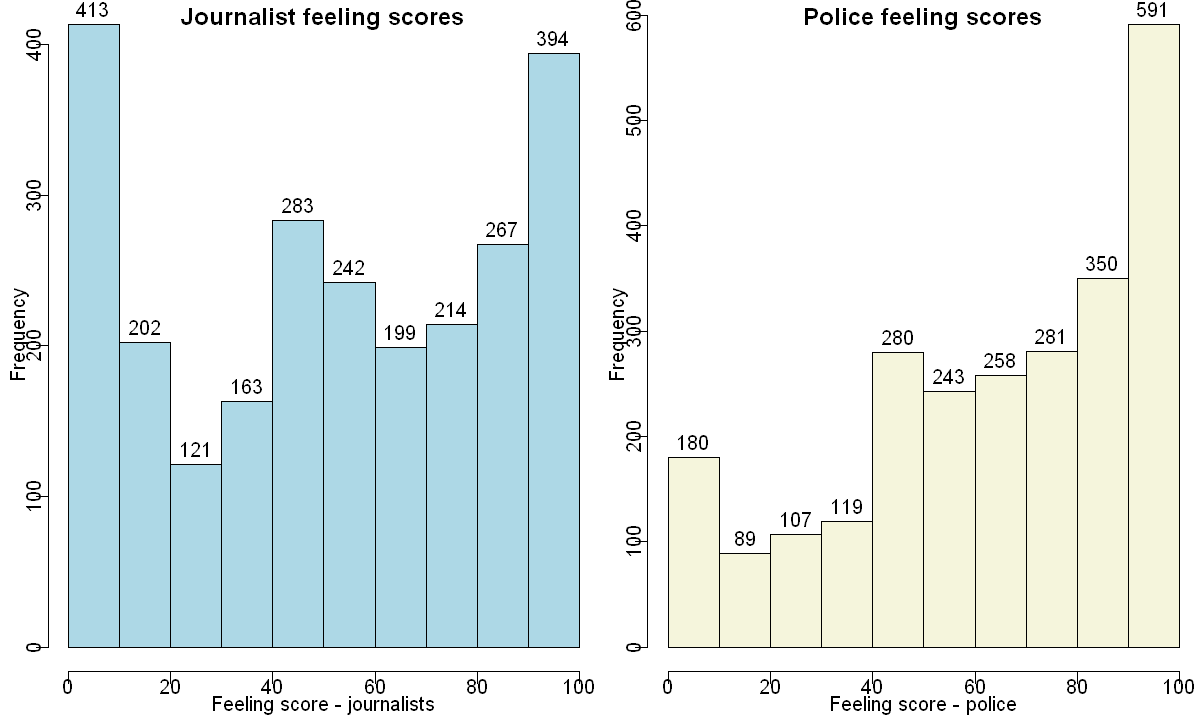

In [30]:
# Treating for no-response by removing those respondents
sub = sub[sub['ftjournal']>=0,]
summary(sub)
paste("Number of rows in the transformed data: ", nrow(sub))

# Single variable analysis (Box-plots)
options(repr.plot.height=6, repr.plot.width = 10)
boxplot(sub$ftjournal, sub$ftpolice, main = "Comparision of respondents feeling - Journalists and Police", at = c(1,2),
        names = c("Journalists", "Police"), las = 1, col = c("orange","red"), border = "brown", horizontal = F,
        notch = TRUE, ylab='Feeling score')
par(mfrow=c(1,2), mar=c(2,2,0,0), mgp=c(.8,.1,0))
x <- hist(sub$ftjournal, main='', col='lightblue', xlab = "Feeling score - journalists")
text(x$mids,x$counts,labels=x$counts, adj=c(0.5, -0.5))
title('Journalist feeling scores', line=-1, adj=0.5)
Y <- hist(sub$ftpolice, main='', col='beige', xlab = "Feeling score - police")
text(Y$mids,Y$counts,labels=Y$counts, adj=c(0.5, -0.5))
title('Police feeling scores', line=-1, adj=0.5)

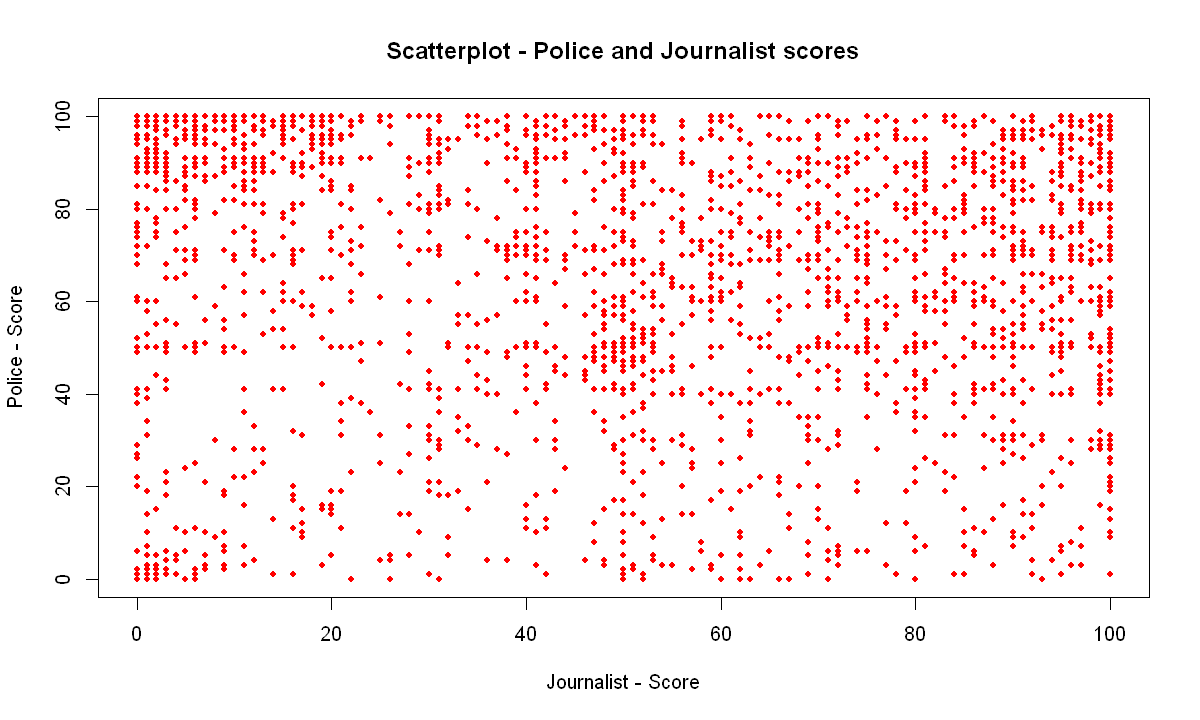

In [4]:
plot(sub$ftjournal, sub$ftpolice, main="Scatterplot - Police and Journalist scores",
     xlab="Journalist - Score", ylab="Police - Score", pch=20, col='red')

### Basic EDA summary

1. All the respondents (2500) provided their feelings about `police` but 2 of them didn't provide an answer about `journalists`. **We suggest removing them from the consideration set as we are going to do paired hypothesis test where it will be important to have legitimate responses for both Police and Journalists**.
2. All the provided answers are in the range of 0 to 100 which makes sense (No need for null removal)
3. Looking at single variable summary, we see that:
    1. The range of scores is higher for Journalists than Police. The median score is higher for police than journalists (Refer Box-plot)
    2. Journalist score are more concentrated on both extremes where are police score is concentrated on the high end. The distribution in the middle is pretty much the same for both classes
4. The Scatterplot shows that individual scores for feeling towards police and journalists are not correlated. At every journalist score bucket, there seem to be a bias towards higher police score which might suggest that poeple feel better towards journalists than police in the sample, but we need to perform a hypothesis test to test this hypothesis. 

## Considerations for Hypothesis Test

There are a few considerations that we will take into account:

1. The feeling score is an **ordinal variable** (not a metric variable). A score of 20 is bettern than a score of 10 for example but it might not be correct to interpret that the difference in feeling towards any group is same when between a response of 10 and 20, 45 and 55 and 90 and 100. In this regard, the difference between these variable have limited meaning. 

2. Every respondent in the sample (excluding 2 which didn't respond to poilce question) have a pair of feeling scores for police and journalists. As per our operational definition, this score is our proxy for respect and we can do a **paired hypothesis test**. 

3. We assume that **each row of data (i.e. respondent) is independent**. This may be a strong assumption given the fact that all of the selected respondents share a common trait (completing most number of survey's as per YouGov panel). Although, it is possible that some of teh data rows are dependent, it is not probable. 

4. **Sampling is not exactly representative of US voting population**. This has been discussed and the authors have tried to compensate for it using weights. We are however assuming that the weight for each participant is 1 (i.e. the sample is representative of the US voting population) for our hypothesis testing exercise below.

The question asks US voters have more respect for which group (Police or Journalists). As we don't have an strong opinion to support any one of the groups, we will start with the **two-sided hypothesis**. If we find that there is actually a stat-sig difference in respect across the two groups, we can test one sided hypothesis to test which one. Below we state the two-sided hypothesis.

## Two sided Hypothesis

$H_0$: There is no difference in respect between police and journalists among US voters.

$H_A$: There is a difference in respect between police and journalists among US voters.

## Appropriate test

Given that we want to do **paired test** and the **variables are Ordinal in nature**, We wil use **sign test** for hypothesis testing. This test has lower power which means there is a higher chance of not being able to detect the effect. The key assumptions are:
1. Differences in Police and Journalist ratings across respondents is independent. As per above discussion, we are assuming this condition to be satisfied
2. The ratings for police and journalists are ordinal (which is obviously true)
3. All the differences are sampled from the same population (which is what we are assuming to be true)


## Significance Level

We want to perform the test at **99% significance level** which means the expected type 1 error rate to be 1%.  

## Conducting the test

In [5]:
# REMOVING ALL THE ROWS OF DATA WHERE THERE IS A TIE BETWEEN THE TWO SCORES
sub1 <- sub[(sub$ftpolice != sub$ftjournal), ] 

# RUNNING THE BINOMIAL TEST 
binom.test(sum((sub1$ftpolice - sub1$ftjournal)> 0), nrow(sub1), p=0.5, alternative = "two.sided", conf.level = 0.99)

# CALCULATING MEDIAN SCORE DIFFERENCE IN TE ORIGINAL DATA
paste("Median difference in rating in overall data :", median(sub$ftpolice - sub$ftjournal))


	Exact binomial test

data:  sum((sub1$ftpolice - sub1$ftjournal) > 0) and nrow(sub1)
number of successes = 1373, number of trials = 2417, p-value =
2.361e-11
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.5417851 0.5940635
sample estimates:
probability of success 
             0.5680596 


[1] "Median difference in rating in overall data : 4"

## Interpretation of the test

To conduct the sign test, we can do the following:

1. Remove all the rows of data where the score for police and journalists is a tie
2. For remaining dataset, define the cases where police score is higher than journalists as 1 and otherwith 0. This way we create a binary vector where we can run a binomial test to check if the proportion mean is 0.5

We have the following observations:

1. The total sample size is 2417. Out of that, there are 1373 respondents who gave higher score to Police than Jourlalists. 
2. The p-value for this test (at 99% significance level) is $2.361 * 10^{-11}$. which is way smaller than our target significance level (of 0.01). Hence, we have statistically significant evidence to reject the Null hypothesis that the US voters repect police and journalists the same. 
3. The 99 percent confidence interval for the median difference in Score for proportion of people favoring police over journalists is [0.5418, 0.5941]. We can see that this number doesn't contain 0.5 which was our null hypothesis.
4. The sample median for the difference between police and journalist median scores is 4

As mentioned before, at this point, we can perform a one-sided hypothesis test to see if the US voter prefer police over journalists.

### One sided Hypothesis

$H1_0$: There is no difference in respect between police and journalists among US voters.

$H1_A$: US voters respect Police more than Journalists.

In [6]:
binom.test(sum((sub1$ftpolice - sub1$ftjournal)> 0), nrow(sub1), p=0.5, alternative = "greater", conf.level = 0.99)


	Exact binomial test

data:  sum((sub1$ftpolice - sub1$ftjournal) > 0) and nrow(sub1)
number of successes = 1373, number of trials = 2417, p-value = 1.18e-11
alternative hypothesis: true probability of success is greater than 0.5
99 percent confidence interval:
 0.5443169 1.0000000
sample estimates:
probability of success 
             0.5680596 


From the above one sample result, we can conclude that at 99% confidence level, we can reject the null hypothesis $H1_0$in favor of the alternative hypothesis $H1_A$. 

## Effect size
A measure of difference can be the median difference in the sample between police and journalist score whcih is 4. Additionally, If we want to use a <u>dimentionless effect size estimate</u>, we can calculate $PS_{dep}$ which is relevant in the case of dependent sample non-parametric testing and calculated as 

$$PS_{dep} = \frac{n_{+}}{N}$$

Here $n_{+}$ is the total number of cases which have police_score > journalist_score and $N$ is the total number of cases in the consideration set (excluding the ties). When we put in the numbers, we have 


$$PS_{dep} = \frac{1373}{2417} = 0.568$$

This effect size indicate **large practical significance**. 

## Practical significance and Discussion

Although we got a highly statistically significant result, the effect size seems to be medium (4 point difference) and it is rather hard to interpret this difference as the feeling score is not a metric. Our research question was specifically about respect rather than likeness hence there is an asymmetry between out research question and the actual question.

## Question 2: Are Republican voters older or younger than Democratic voters?

## Introduction

To address this question, we need to know two things: 1) what constitutes a "Republican (Democratic) voter?, and 2) How old are the individuals in these two groups.

The first question is the more difficult one to answer. The issue lies in the phrasing of the quesiton, as there are several ways to interpret what a "Republican voter" is. Should we use party membership, although that does not neccessarily mean the person votes? Should we count independent voters who lean Repbulican (indicating that they have likely voted for Republicans in the past and will do so again) as Republican voters? 

For the purposes of this analysis, we have operationalized the question in the following way: we consider a person who "generally thinks of themselves as a Republican or Democrat" to be a Republican or Democratic voter. This is not a perfect definition for the reasons stated above, but it gives us the best view of the respective parties voting bases. 

Accordingly, we use the <b> pid1d and pid1r</b> variables, which is the answer to the question "Generally speaking, do you consider yourself a Republican, a Democrat...". These two variables need to be merged into a single table since together they are the full dataset that answers the question posed. We also used the <b> birthyr </b> variable which tells us the year the voter was born.

## Exploratory data analysis

[1] "Rows of data with missing score entry"


,pid1d,pid1r,birthyr
497,-1,-7,1993
596,-7,-1,1953


[1] "Overall Summary of the filtered data"


     pid1d             pid1r            birthyr    
 Min.   :-1.0000   Min.   :-1.0000   Min.   :1927  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:1956  
 Median :-1.0000   Median :-1.0000   Median :1966  
 Mean   : 0.4155   Mean   : 0.4644   Mean   :1969  
 3rd Qu.: 2.0000   3rd Qu.: 2.0000   3rd Qu.:1983  
 Max.   : 4.0000   Max.   : 4.0000   Max.   :2000  

[1] "Number of records (total) : 1466"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   40.00   55.00   52.86   65.00   90.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   53.00   50.23   63.00   91.00 

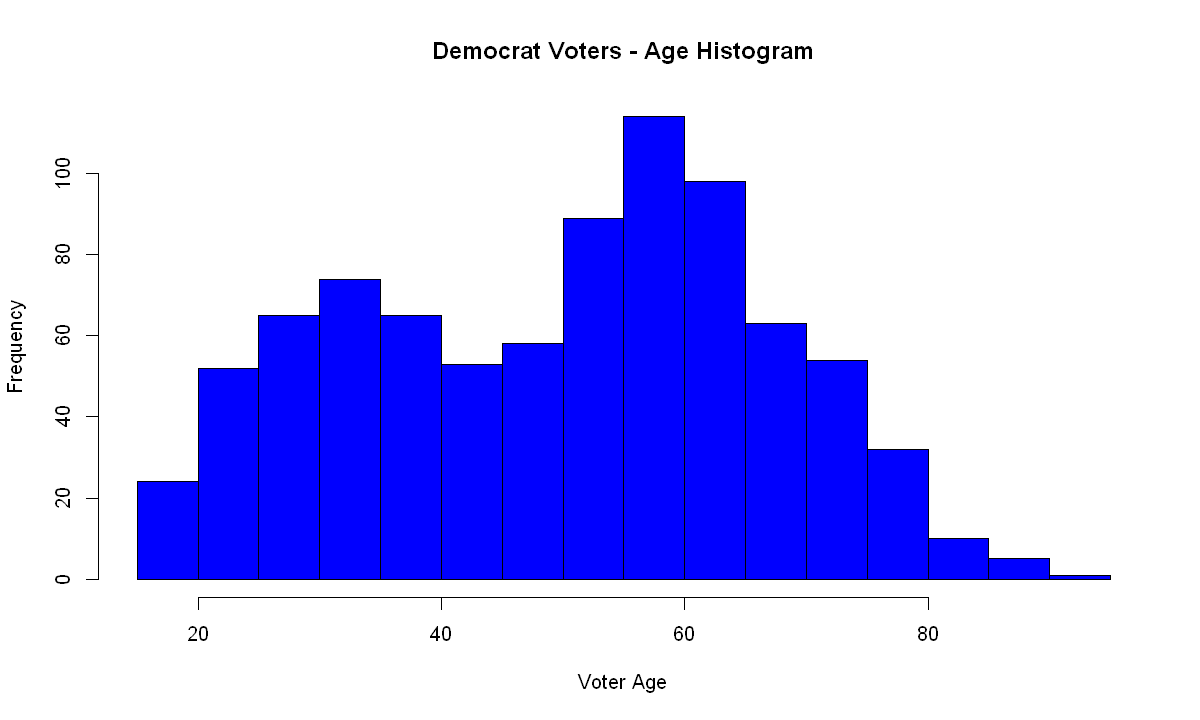

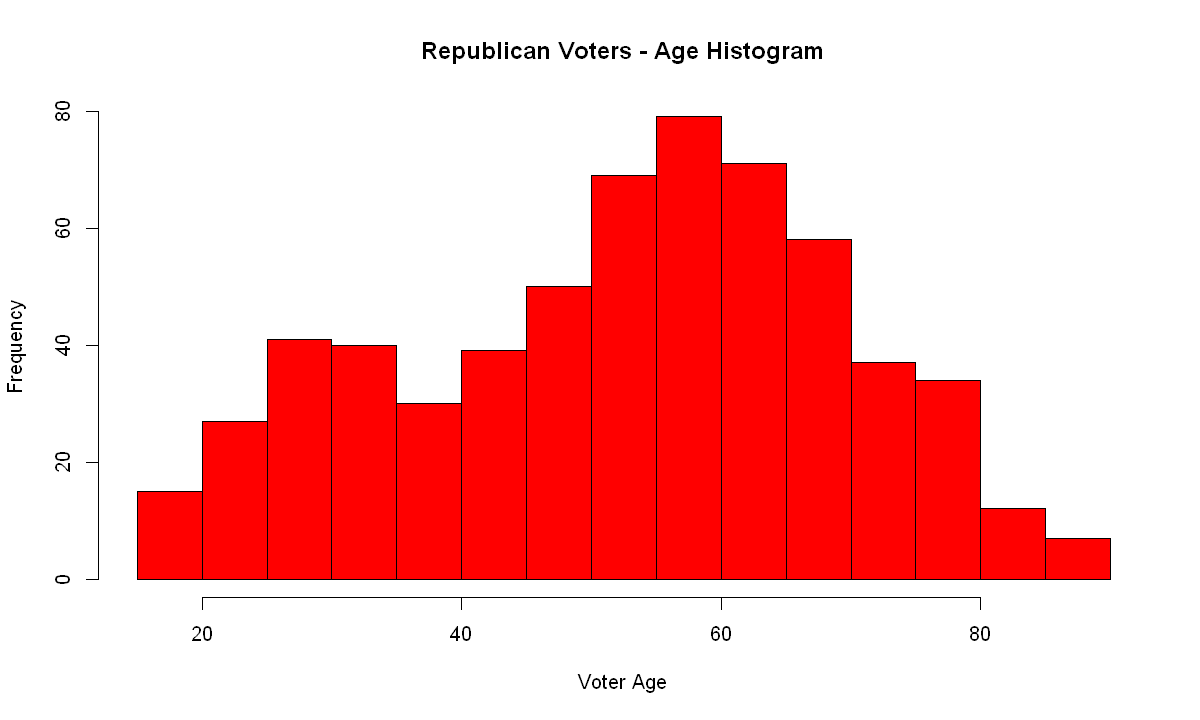

In [31]:
library(dplyr)
#if(!require(lsr)){install.packages("lsr")}
library(lsr)

party <- A[,c('pid1d', 'pid1r','birthyr')]

# Respondents that declined to answer the party affliation question
print("Rows of data with missing score entry")
party[(party$pid1d == -7)|(party$pid1r == -7),]
party <- party[!((party$pid1d == -7)|(party$pid1r == -7)),]

# Summary of the filtered resulting dataset
print("Overall Summary of the filtered data")
summary(party)

# Tagging the part affliations
party$party <- ifelse(party$pid1d == 2 | party$pid1r == 2, 'REPUBLICAN', ifelse(party$pid1d == 1 | party$pid1r == 1, 
                                                                                'DEMOCRAT', 'O'))

# Removing all the data rows representing votes who are neither democrat nor republicans
party <- party[party$party != 'O',]

# Final dataset size
paste("Number of records (total) :", nrow(party))

#Create a separate dataset for each party
repid <- filter(party, party == 'REPUBLICAN')
demid <- filter(party, party == 'DEMOCRAT')

#Calculating Age

repid$age <- 2018 - repid$birthyr
demid$age <- 2018 - demid$birthyr

#Summarize each party-specific data set
summary(repid$age)
summary(demid$age)

#Show a histogram of each part-specific dataset
hist(demid$age, main='Democrat Voters - Age Histogram', col = 'blue', xlab = 'Voter Age')
hist(repid$age, main='Republican Voters - Age Histogram', col = 'red', xlab = 'Voter Age')

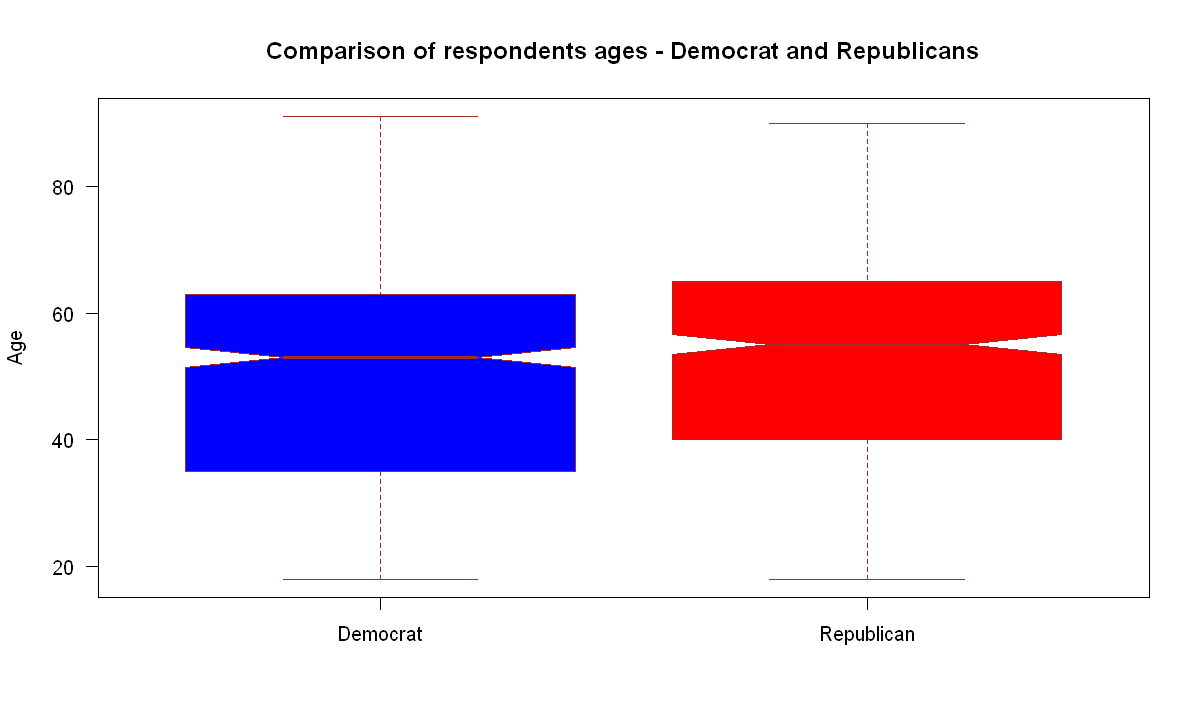

In [32]:
boxplot(demid$age, repid$age, main = "Comparison of respondents ages - Democrat and Republicans", at = c(1,2),
        names = c("Democrat", "Republican"), las = 1, col = c("blue","red"), border = "brown", horizontal = F,
        notch = TRUE, ylab='Age')

#### <i>Basic EDA summary</i>

Steps:

1) Merge pid1d and pid1r, then create a data frame that only has the responses to the pid1d/pid1r and birth year

2) Do a simple summary of the new data frame. The answer to pid1d/pid1r is not meaningful, but the answer to birth year is.

3) Break the relevant groups up using a filter command. Here we filter on response 1 (people who identify as Democrats) and 2 (people who identify as Republicans).

    a) 1466 of 2500 (~59%) of people responded in one of these two ways
    
    b) Since the question is restricts the population to necessarily belonging to one of these 
    two groups, dropping ~41% of responses is appropriate. 
    
4) Do a summary of the two groups

5) Show a histogram of the Age of these two groups (with 2018 as the reference year). A brief look at these graphs shows that they have similar meansand the shape of the distributions is also similar. It seems roughly normal and is not skewed.

## Hypothesis test

A simple two-tailed t-test is the most appropriate test in this case. Since we don't have a hypothesis for why one group "should" be older than another, we should stick to testing whether the means are different or not.

<b>Assumptions of the t-test</b>

$1$: Republican and Democratic voter ages are independent. We hold this to be obviously true.

$2$: The means of the two populations are approximately normally distributed. We see that this is generally true through the hisotgrams of each variable. On top of that, sample sizes are all > 400 and the data is not skewed in any extreme manner, so we can rely on the Central Limit Theorem to ensure that this assumption holds true.

$3$: Age is a metric variable

$4$: Variance of the two samples seem similar from the histogram

$5$: For this analysis, we are assuming that the sample is random and representative of general US voting population. This is a strong assumption (specially given the concerns of the survey authors) and weights are available to somewhat correct for this. But for this analysis, we will not be using the weights.

#### Two sided Hypothesis Test

$H_0$: There is no difference in birth year between Republican and Democratic voters.

$H_A$: There is a difference in birth year between Republican and Democratic voters.

#### Significance Level

We will perform this test to a <b>99% confidence level</b>.

#### Follow up One-sided Hypothesis Test

**If** we reject the null hypothesis based on the two-tailed t test, we will follow up with a one-tailed t-test in the direction that we suspect there is a difference. Based on an initial look at the historgrams, we suspect that Republicans are older than Democrats, so we may find it useful to run a subsequent one-sided test to see if the mean age of Republicans is older than that of Democrats.

$H_0$: There is no difference in age between Republican and Democratic voters.

$H_A$: The mean age of Democratic voters is less than the mean age of Republican voters.

In [16]:
#Conduct a two-tailed test to a 99% confidence level
t.test(demid$age, repid$age, conf.level = .99)

#Cohen's D to assess practical significance of the result
paste("Cohen's D : ",cohensD(demid$age, repid$age))

#Follow up with a one-tailed test to determine if Republicans are older than Dems, to a 99% conf level
t.test(demid$age, repid$age, alternative = "less", conf.level = .99)


	Welch Two Sample t-test

data:  demid$age and repid$age
t = -2.939, df = 1309.7, p-value = 0.00335
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -4.9235927 -0.3206645
sample estimates:
mean of x mean of y 
 50.23337  52.85550 


[1] "Cohen's D :  0.15575500851897"


	Welch Two Sample t-test

data:  demid$age and repid$age
t = -2.939, df = 1309.7, p-value = 0.001675
alternative hypothesis: true difference in means is less than 0
99 percent confidence interval:
      -Inf -0.544058
sample estimates:
mean of x mean of y 
 50.23337  52.85550 


#### Explanation of Results

<b>We reject the null hypothesis</b>, with a p-value of 0.00335 at 99% confidence level. This means that there is a statistically significant difference in the means of the birth year's of the Republican and Democratic sample voters.

We also found a  low practical significance (Cohen's D = 0.1558). This means that while the difference is real, it is not a hugely significant feature of the two groups. This is not surprising based even on a quick look at the histrograms in the EDA section.

We then ran a one-sided t-test, where we reject the null hypothesis (at 99% confodence level) in favor of the alternative hypothesis that Democratic voter's mean age is less than that of Republican voters. Here, our p-value was .00168.

In conclusion, based on this data, we can say  that Republican voters are older than Democratic voters on average. However, the 

## Question 5

## Introduction
**Climate change** is a politically charged issue, one of the most politically dividing in the context of US politics. On the party lines, Democrats and Republicans have very different opinions about this issue. As this is a global issue of significance, it is important to note the voter sentiment around it. In politics, nothing is permanent and if enough voter sentiment changes around the subject (one way or the other) we can expect party leadership to change the tune on this matter. 

In this regard, we expect the liberal-conservative bias to show up in the public opinion. We want to go one step further and see if we can come up with something more interesting. 


## Political question

The key question we want to answer is that **between the Democrat and Republican voters, what is the difference between the proportion of voters with extreme opinions about climate change**? The intuition behind this question is that if a large proportion of voters are on a extreme on some policy position, there is less motivation for the political parties to difer from that extreme. On the other hand, if the voting pupulation is diffused (and not concentrated on one of the extremes) then there is incentive for political parties to change their positions in order to compete for the swing vote. 

In this regard, the positions where the voting population is not on the extremes become more important politically as these become the grounds for getting the swing votes. 


## Design and Operational Definitions


### Opinion Tagging
`Extreme` is a loaded word and we define it differently based on the cohort. There are five choices for the question `How important is the issue of climate change to you personally? `. We define the following encoding for Democrat and republican voters:

|Answer Option|Democrat encoding|Republican Encoding|
|--|--|--|
|Not at all important (1)|0|1|
|A little important (2)|0|0|
|Moderately important (3)|0|0|
|Very important (4)|0|0|
|Extremely important (5)|1|0|

Via this encoding, we are trying to understand that within each voting cohort (D and R), what is the proportion of extreme response. 

### Party affliation tagging

We are using the combination of `pid1r` and `pid1d` columns for this. We will only consider the rows where each of these column values are either 1 or 2 (with 1 being democrat and 2 being republican). We will disregard all other values. 

**CAUTION**: In this way, we are disregarding every respondent who has declined to answer this question, independent and supports other party. The last are ok because we explicitely are interested in Democrat and Republican split but the first is concerning as this means we might be missing some undecided candidate. (Analysis show that we wil be disregarding only 2 people thsi was so that is ok)

In [18]:
party <- A[,c('pid1d', 'pid1r','warmyou')]

# Respondents that declined to answer the party affliation question
print("Rows of data with missing score entry")
party[(party$pid1d == -7)|(party$pid1r == -7),]
party <- party[!((party$pid1d == -7)|(party$pid1r == -7)),]

# Summary of the filtered resulting dataset
print("Overall Summary of the filtered data")
summary(party)

# Tagging the part affliations
party$party <- ifelse(party$pid1d == 2 | party$pid1r == 2, 'REPUBLICAN', ifelse(party$pid1d == 1 | party$pid1r == 1, 
                                                                                'DEMOCRAT', 'O'))

# Removing all the data rows representing votes who are neither democrat nor republicans
party <- party[party$party != 'O',]

# Final dataset size
paste("Number of records (total) :", nrow(party))

[1] "Rows of data with missing score entry"


,pid1d,pid1r,warmyou
497,-1,-7,5
596,-7,-1,1


[1] "Overall Summary of the filtered data"


     pid1d             pid1r            warmyou     
 Min.   :-1.0000   Min.   :-1.0000   Min.   :1.000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:2.000  
 Median :-1.0000   Median :-1.0000   Median :3.000  
 Mean   : 0.4155   Mean   : 0.4644   Mean   :3.142  
 3rd Qu.: 2.0000   3rd Qu.: 2.0000   3rd Qu.:4.000  
 Max.   : 4.0000   Max.   : 4.0000   Max.   :5.000  

[1] "Number of records (total) : 1466"

## Potential issues

1. We are using self declaration by respondents on the face value. We also have the data available around 2016 voting and it might be more relevant to use that as the source of party affliation. Our core assumption is that the self reported affliations are ok

2. Voter opinion should be an imporant factor in deciding the position a political party take but there can be multiple reasons for a delay between change in public opinion and change in party leadership position. This analysis doesn't account for that

3. This analysis takes into cosideration that high proportion if voters of respective parties hold extreme opinions about climate change (whcih came from the data). If in coming time that changes (i.e. less percent of voters have extreme opinion), the basis of this study will have to change. 

4. We are **assuming** that party position on global warming is a factor which affects voting behavior. If it doesn't then the proportion of people with extreme opinions on thsi subject will not matter at all to party leadership. 

## Exploratory analysis

As per our discussion above, both democrat and republicans have different connotations for extreme opinions. Following the schema discussed above, we will transfrom the `warmyou` variable into a binary vector. There are total 1466 rows of data in our consideration set (609-Republican| 857-Democrat). Overall, the data quality after appropriate tagging is good and no Nulls are present in the data. We have already extracted out the respondents that didn't provide information about their party affliation. The data ranges for all three variables is as expected.

In [20]:
# tagging the extreme results appropriately in line with the party lines

party$extreme_opinion <- ifelse((party$party == 'REPUBLICAN')&(party$warmyou==1), 
                                1, ifelse((party$party == 'DEMOCRAT')&(party$warmyou==5), 1, 0))

## Visualization

[1] "The distribution across classes"


            
               0   1
  DEMOCRAT   518 339
  REPUBLICAN 332 277

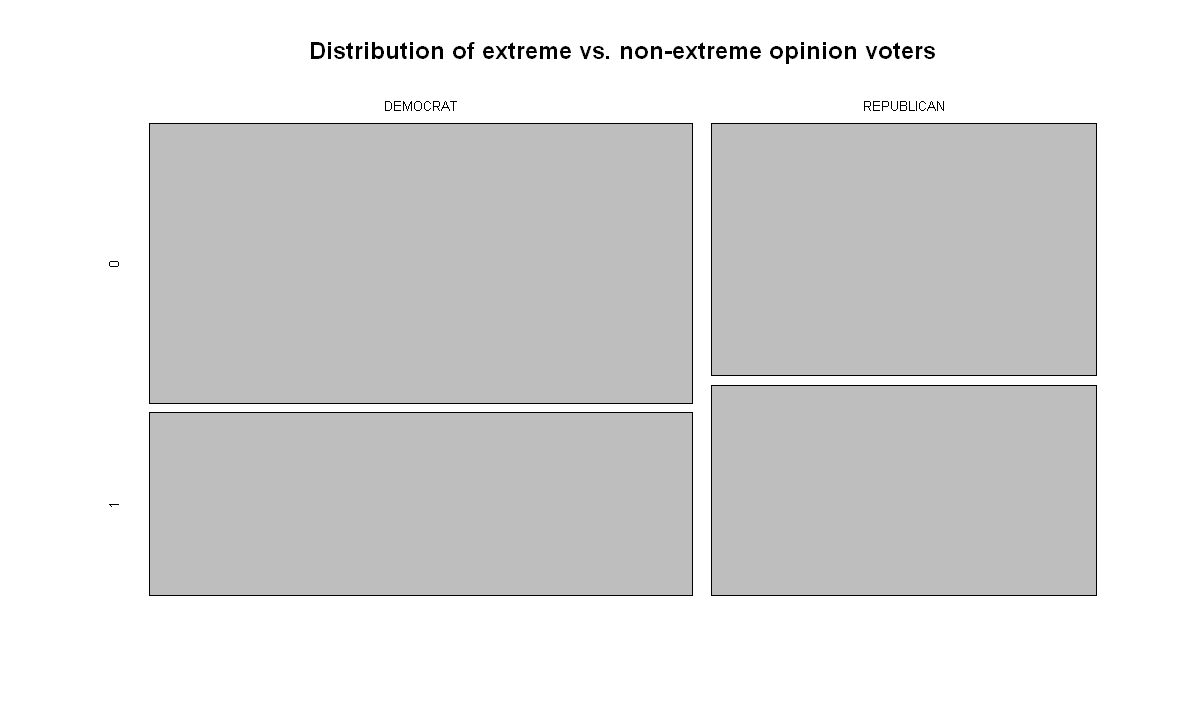

In [21]:
print('The distribution across classes')
table(party$party, party$extreme_opinion)

plot(table(party$party, party$extreme_opinion), main = 'Distribution of extreme vs. non-extreme opinion voters')

## Hypothesis - Two sided

$H_0$: Proportion of voters with extreme responses between democrat and republican voters is the same

$H_A$: Proportion of voters with extreme responses between democrat and republican voters is NOT the same

## Significance level 

We want to perfrom the test at 95% significance level (i.e. Expected FPR of 5%) 

## Appropriate test selection and conditions

**2-proportion z-test** seems to be appropriate for this case. The key conditions for this test are:

1. We have a simple random sample - This condition is not met exactly but for all the analysis before this section we are assuming this to be true. Hence we can assume this condition to be met here as well

2. Independent sample - Sample should be independent. As mentioned in previous analysis, this might be a strong assumption but we are anyways considering it to be true

3. Sample size restrictions - Each sample has > 10 respondents and population is atleast 20 times bigger than the sample

## Conduction of the test

In [15]:
prop.test(x = c(sum(party[(party$party == 'DEMOCRAT')&(party$extreme_opinion==1), 'extreme_opinion']), 
                sum(party[(party$party == 'REPUBLICAN')&(party$extreme_opinion==1), 'extreme_opinion'])),
          n=c(nrow(party[party$party == 'DEMOCRAT', ]), nrow(party[party$party == 'REPUBLICAN', ])),
          conf.level = 0.95,alternative = 'two.sided', correct=F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(party[(party$party == "DEMOCRAT") & (party$extreme_opinion ==  out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party ==     1), "extreme_opinion"]), sum(party[(party$party == "REPUBLICAN") &  out of     "REPUBLICAN", ]))    (party$extreme_opinion == 1), "extreme_opinion"])) out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party == 
X-squared = 5.1348, df = 1, p-value = 0.02345
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.11061828 -0.00793788
sample estimates:
   prop 1    prop 2 
0.3955659 0.4548440 


We tested the two sided hypothesis that the proportion of extreme opinion voters in Demotratic and Republican party are same.  Against the alternate hypothesis that they are different. From the 2-sample z-test we see that 

1. The p-value is 0.02345
2. 95% confidence interval for the difference in proportions is [-0.1106, -0.0079] (which doesn't contains 0)

At 95% confidence level, we have sufficient evidence coming from the data to **reject the Null Hypothesis**. 


## One sided Hypothesis test

We can now test the hypothesis that among Republican voters, prevelance of extreme opinion is higher than among Democrat voters. 

## Hypothesis - One sided

$H_0$: Proportion of voters with extreme responses between democrat and republican voters is the same

$H_A$: Proportion of voters with extreme responses among democrat voters is less than republican voters


In [16]:
prop.test(x = c(sum(party[(party$party == 'DEMOCRAT')&(party$extreme_opinion==1), 'extreme_opinion']), 
                sum(party[(party$party == 'REPUBLICAN')&(party$extreme_opinion==1), 'extreme_opinion'])),
          n=c(nrow(party[party$party == 'DEMOCRAT', ]), nrow(party[party$party == 'REPUBLICAN', ])),
          conf.level = 0.95,alternative = 'less', correct=F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(party[(party$party == "DEMOCRAT") & (party$extreme_opinion ==  out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party ==     1), "extreme_opinion"]), sum(party[(party$party == "REPUBLICAN") &  out of     "REPUBLICAN", ]))    (party$extreme_opinion == 1), "extreme_opinion"])) out of c(nrow(party[party$party == "DEMOCRAT", ]), nrow(party[party$party == 
X-squared = 5.1348, df = 1, p-value = 0.01173
alternative hypothesis: less
95 percent confidence interval:
 -1.00000000 -0.01619203
sample estimates:
   prop 1    prop 2 
0.3955659 0.4548440 


## Results
At 95% confidence level, we have sufficient evidence to reject the null hypothesis in favor of one sided alternative hypothesis. 

## Effect size

The difference of proportion (which stands at -0.0592) in the sample between democrat voters with extreme opinions and republicans can be a good proxy for the effect size. Converting this to percentages, this says that the affinity to extreme with respect to climate change is ~6% higher among republican voters than democrat voters. 

If we want to use a dimentionless measure of effect size, we can use Cohen's H. More details about this can be found from https://en.wikipedia.org/wiki/Cohen%27s_h. The effect size table showcases:

|Cohen's H|Interpretation|
|--|--|
|h = 0.20|Small effect size|
|h = 0.50|Medium effect size|
|h = 0.80|Large effect size|

From the below analysis, we see that **the effect size if small**. 

In [21]:
cohens_h = function( prop_1, prop_2, n1, n2, ci = 0.95 ){
    x1 = asin(sign(prop_1) * sqrt(abs(prop_1)))
    x2 = asin(sign(prop_2) * sqrt(abs(prop_2)))
    es = x1 - x2
    se = sqrt(0.25 * (1 / n1 + 1 / n2 ))
    ci_diff = qnorm(1 - (1-ci) / 2) * se
    return( c( h = es*2, h_low = (es-ci_diff)*2, h_upp = (es+ci_diff)*2 ) )
}

cohens_h(prop_1=0.4548440, prop_2=0.3955659, n1=332+277, n2=518+339, ci = 0.95)

h      h_low      h_upp 
0.11998227 0.01610608 0.22385846

## Conclusion

We tried to understand the opinions of US voters vis-a-vis party opinions along the topic of climate change. What we see is that a huge proportion of voters on both sides cling to the extremes (democrats to the importance of this topic and Republicans to the unimportance). Also there is a **statistically significant difference** between the extreme opinion voters across the party lines although the effect size is small. 

There are significantly more extreme opinion holding voters on republican side than democrat (~ 6%). In the long run, this analysis give rise to the idea that atleast in the short run, there is less chance for Republican party line to change its narrative around Climate change (in absence of public support).

More work need to be done to understand this further in terms of respondant age and other demographic factors.